In [5]:
#Imports #Task 1


import pandas as pd
Grc_df = pd.read_csv('Grocery_dataset.csv')

print(len(Grc_df))
print(len(Grc_df.columns))

print(Grc_df.head(10)) #Print the first 10 rows
print(Grc_df.tail(10)) #Print the last 10 rows
#5000 rows, 12 columns


5000
12
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Veget

In [6]:
#Task 2
print(Grc_df.isna().sum()) #Null values in item weight and outlet size using median on weight because they are numbers but dropping size because they are small mediuim and large. 
(Grc_df["Item_Weight"].mean(skipna=True))
Grc_df["Item_Weight"] = Grc_df["Item_Weight"].fillna(Grc_df["Item_Weight"].median())
Grc_df = Grc_df.dropna(subset=["Outlet_Size"])

print(Grc_df.isna().sum())



Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [8]:
#Task 3
size_counts = Grc_df["Outlet_Size"].value_counts()
unique_valuesOS_count = Grc_df["Outlet_Size"].nunique()
max_size = size_counts.idxmax()
min_size = size_counts.idxmin()

print("There are", unique_valuesOS_count, "unique sizes.")
print("Most frequent Outlet_Size:", max_size)
print("Least frequent Outlet_Size:", min_size)

There are 3 unique sizes.
Most frequent Outlet_Size: Medium
Least frequent Outlet_Size: High


In [9]:
#Task 4 there are different formatting for low fat and regular resulting in 5 diferent categories changed all to the same
Grc_df["Item_Fat_Content"] = Grc_df["Item_Fat_Content"].str.lower()

Grc_df["Item_Fat_Content"] = Grc_df["Item_Fat_Content"].replace({
    "lf": "Low fat",
    "lowfat": "low fat",
    "reg": "regular"
})

unique_valuesIFC_count = Grc_df["Item_Fat_Content"].nunique()
print(unique_valuesIFC_count)
print(Grc_df)





3
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          low fat         0.016047   
1              DRC01        5.920          regular         0.019278   
2              FDN15       17.500          low fat         0.016760   
4              NCD19        8.930          low fat         0.000000   
5              FDP36       10.395          regular         0.000000   
...              ...          ...              ...              ...   
4994           NCI42       18.750          low fat         0.010382   
4996           DRL60        8.520          low fat         0.027059   
4997           FDG20       15.500          regular         0.126200   
4998           FDF56       16.700          regular         0.119462   
4999           FDV33        9.600          regular         0.027455   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks

In [10]:
#Task 5 labels the columns 0,6 and axis =1 is the columns and 0 is rows so it drops the ones at index 0 and 6 and creates a new

Grc_new_df = Grc_df.drop(Grc_df.columns[[0,6]],axis=1)


print(Grc_new_df)
                    

      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          low fat         0.016047                  Dairy   
1           5.920          regular         0.019278            Soft Drinks   
2          17.500          low fat         0.016760                   Meat   
4           8.930          low fat         0.000000              Household   
5          10.395          regular         0.000000           Baking Goods   
...           ...              ...              ...                    ...   
4994       18.750          low fat         0.010382              Household   
4996        8.520          low fat         0.027059            Soft Drinks   
4997       15.500          regular         0.126200  Fruits and Vegetables   
4998       16.700          regular         0.119462  Fruits and Vegetables   
4999        9.600          regular         0.027455            Snack Foods   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Lo

In [11]:
#Task 6 

SubType_1 = Grc_new_df[Grc_new_df["Outlet_Type"]== "Supermarket Type1"]
SubType_2 = Grc_new_df[Grc_new_df["Outlet_Type"]== "Supermarket Type2"]


print("Supermarket Type1 DataFrame:")
print(SubType_1)

print("\nSupermarket Type2 DataFrame:")
print(SubType_2)

Supermarket Type1 DataFrame:
      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0            9.30          low fat         0.016047                  Dairy   
2           17.50          low fat         0.016760                   Meat   
4            8.93          low fat         0.000000              Household   
6           13.65          regular         0.012741            Snack Foods   
10          11.80          low fat         0.000000  Fruits and Vegetables   
...           ...              ...              ...                    ...   
4991        17.60          low fat         0.018905     Health and Hygiene   
4993         5.98          low fat         0.075675            Hard Drinks   
4994        18.75          low fat         0.010382              Household   
4996         8.52          low fat         0.027059            Soft Drinks   
4998        16.70          regular         0.119462  Fruits and Vegetables   

      Item_MRP  Outlet_Establishme

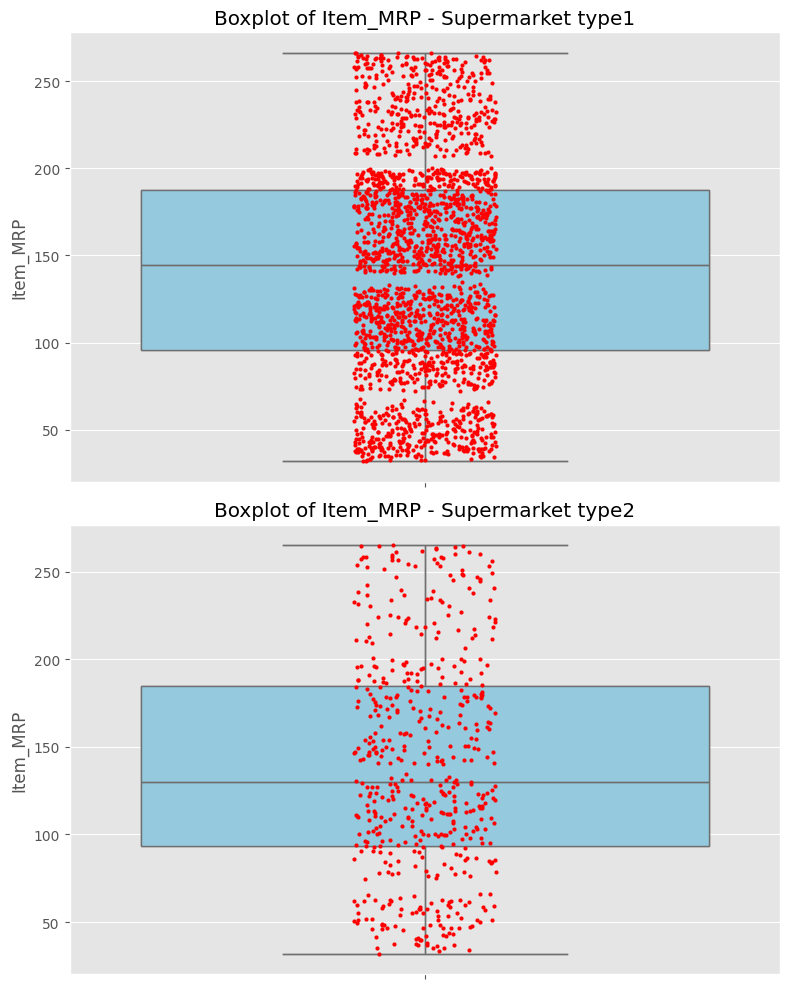

In [12]:
#Task 7 start

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

fig, axes = plt.subplots(2,1, figsize = (8,10))

sns.boxplot(y="Item_MRP",data=SubType_1,ax=axes[0],color="skyblue")
axes[0].set_title("Boxplot of Item_MRP - Supermarket type1")

sns.boxplot(y="Item_MRP",data=SubType_2,ax=axes[1],color="skyblue")
axes[1].set_title("Boxplot of Item_MRP - Supermarket type2")

sns.boxplot(y="Item_MRP", data=SubType_1, ax=axes[0], color="skyblue")
sns.stripplot(y="Item_MRP", data=SubType_1, ax=axes[0], color="red", size=3, jitter=True)

sns.boxplot(y="Item_MRP", data=SubType_2, ax=axes[1], color="skyblue")
sns.stripplot(y="Item_MRP", data=SubType_2, ax=axes[1], color="red", size=3, jitter=True)


plt.tight_layout()
plt.show()

#Supermarket type 1 has the higher median MRP




In [13]:
#Task 8
Grc_concat_df = pd.concat([SubType_1,SubType_2])

Grc_concat_df = Grc_concat_df.sort_values(by="Item_Outlet_Sales",ascending=True)

Lowest_sales = Grc_concat_df.iloc[0]

print(Lowest_sales)

#Tier 3 has the lowest sales

Item_Weight                               20.5
Item_Fat_Content                       low fat
Item_Visibility                       0.143164
Item_Type                            Household
Item_MRP                                34.919
Outlet_Establishment_Year                 1987
Outlet_Size                               High
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                       73.238
Name: 2370, dtype: object


In [14]:
#Task 9


Grc_Concat_df_multi = Grc_concat_df.set_index(["Outlet_Size", "Outlet_Location_Type"])

# Sjekk resultatet
print(Grc_Concat_df_multi.head())

                                  Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
High        Tier 3                     20.500          low fat   
Medium      Tier 3                      6.635          regular   
            Tier 3                      6.320          low fat   
Small       Tier 1                     19.250          low fat   
Medium      Tier 1                      6.215          low fat   

                                  Item_Visibility              Item_Type  \
Outlet_Size Outlet_Location_Type                                           
High        Tier 3                       0.143164              Household   
Medium      Tier 3                       0.046278           Frozen Foods   
            Tier 3                       0.012770                   Meat   
Small       Tier 1                       0.108030              Household   
Medium      Tier 1                       0.012168  Fruits and Vegetables   

    

In [15]:
#Task 10

Grc_concat_df['Weight_Bucket'] = pd.cut(Grc_concat_df['Item_Weight'], bins=10)

# Gruppér etter hver bucket og beregn statistikk
bucket_stats = Grc_concat_df.groupby('Weight_Bucket', observed=True)['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

print(bucket_stats)


                       mean     min     max  count
Weight_Bucket                                     
(4.538, 6.234]     5.618919   4.555   6.215    185
(6.234, 7.914]     7.111354   6.235   7.905    336
(7.914, 9.594]     8.733872   7.930   9.500    328
(9.594, 11.273]   10.341739   9.600  11.150    253
(11.273, 12.952]  12.090612  11.300  12.850    286
(12.952, 14.632]  13.728602  13.000  14.600    236
(14.632, 16.312]  15.491924  14.650  16.250    291
(16.312, 17.991]  17.181463  16.350  17.850    294
(17.991, 19.671]  18.853226  18.000  19.600    279
(19.671, 21.35]   20.369412  19.700  21.350    255
